In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"E:\Datasets\bmi.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
df = df.drop(['Index'],axis=1)
df

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


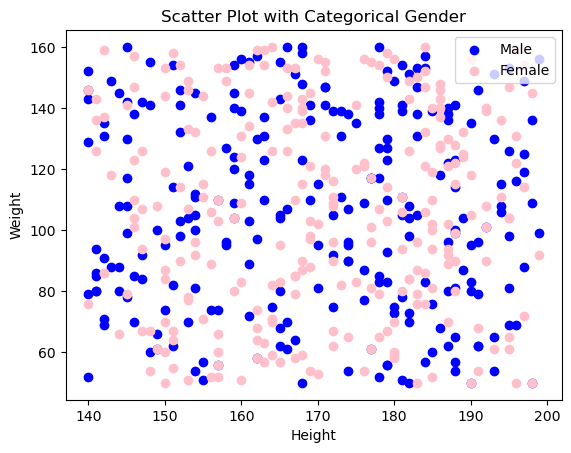

In [9]:
import matplotlib.pyplot as plt

# Separate data based on gender
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Plot the data
plt.scatter(male_data['Height'], male_data['Weight'], label='Male', color='blue')
plt.scatter(female_data['Height'], female_data['Weight'], label='Female', color='pink')

# Add labels and title
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatter Plot with Categorical Gender')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [10]:
df

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])

In [14]:
df

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
495,0,150,153
496,0,184,121
497,0,141,136
498,1,150,95


In [16]:
X = df[['Height','Weight']]
X

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [18]:
y = df['Gender']
y

0      1
1      1
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    1
Name: Gender, Length: 500, dtype: int32

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state = 5)

In [20]:
X_train

,Height,Weight
247,142,159
390,167,58
186,167,135
484,188,115
139,159,124
...,...,...
486,160,109
189,158,95
495,150,153
206,145,99


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\iamaj\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)


C:\Users\iamaj\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.55